In [51]:
import numpy as np
import plotly.express as px
from datetime import datetime
import time
import json
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime as dt
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

### Reading data

In [52]:
#Local file
path = './datasets/'
object_name = 'madrid-air-quality.csv'
df = pd.read_csv(path + object_name)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.sort_values(by="date")
# df.reset_index(level=0, inplace=True)
df.head(5)

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2013-12-31,,13,20,18,2,
2014-01-01,34,11,21,22,2,
2014-01-02,36,14,23,25,1,
2014-01-03,40,10,30,15,1,
2014-01-04,26,15,26,17,1,


### Cleaning data

In [53]:
# Replacing blank spaces
df = df.replace(' ', '', regex=True)
df = df.replace('', np.nan, regex=True)

# Deleting co column
del df[' co']

df.isna().sum()

 pm25     19
 pm10     18
 o3       27
 no2      19
 so2     123
dtype: int64

In [54]:
# Dropping NaN
df = df.dropna(axis=0)
df

,pm25,pm10,o3,no2,so2
date,,,,,
2014-01-01,34,11,21,22,2
2014-01-02,36,14,23,25,1
2014-01-03,40,10,30,15,1
2014-01-04,26,15,26,17,1
2014-01-05,36,19,23,22,2
...,...,...,...,...,...
2022-03-25,39,17,28,12,1
2022-03-26,44,30,29,12,1
2022-03-27,92,50,33,17,1


In [55]:
# Converting to int
df= df.astype(int)
df.dtypes

 pm25    int64
 pm10    int64
 o3      int64
 no2     int64
 so2     int64
dtype: object

### Defining prophet model

In [56]:
def fit_model(df):
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    return m, forecast, future

# def fb_plots(m, forecast):
#     return plot_plotly(m, forecast)

def fb_plot(m, forecast, x):
    fig1 = m.plot(forecast)

    fig1.show()

def fb_subplots(m, forecast, x):
    fig2 = m.plot_components(forecast)

    fig2.show()

In [57]:
df.reset_index(level=0, inplace=True)
pm5_values = df[['date',' pm25']]
pm5_values.columns = ["ds","y"]

model_values, forecast_values, future_values = fit_model(pm5_values)

/home/jarmi/GREENMOV/jupyter/jupyter_venv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -42.0686
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4684.39   4.55523e-05       61.6706           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     165       4684.44   5.66517e-07       68.5949           1           1      213   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jarmi/GREENMOV/jupyter/jupyter_venv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jarmi/GREENMOV/jupyter/jupyter_venv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [70]:
forecast_values[['ds','yhat']]

,ds,yhat
0,2014-01-01,65.675393
1,2014-01-02,66.271891
2,2014-01-03,64.698361
3,2014-01-04,61.668654
4,2014-01-05,59.799232
...,...,...
3115,2023-03-28,48.964998
3116,2023-03-29,49.897271
3117,2023-03-30,50.929892
3118,2023-03-31,49.812444


### Plotting figures

/tmp/ipykernel_1370/222498279.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


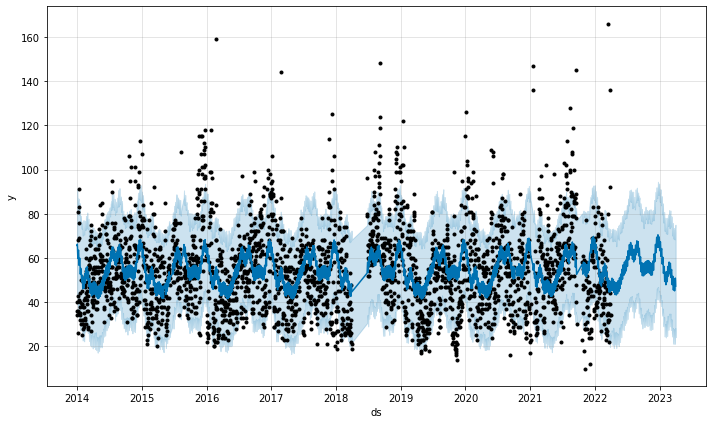

In [58]:
fb_plot(model_values, forecast_values, 'value')

/home/jarmi/GREENMOV/jupyter/jupyter_venv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jarmi/GREENMOV/jupyter/jupyter_venv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jarmi/GREENMOV/jupyter/jupyter_venv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_1370/222498279.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figur

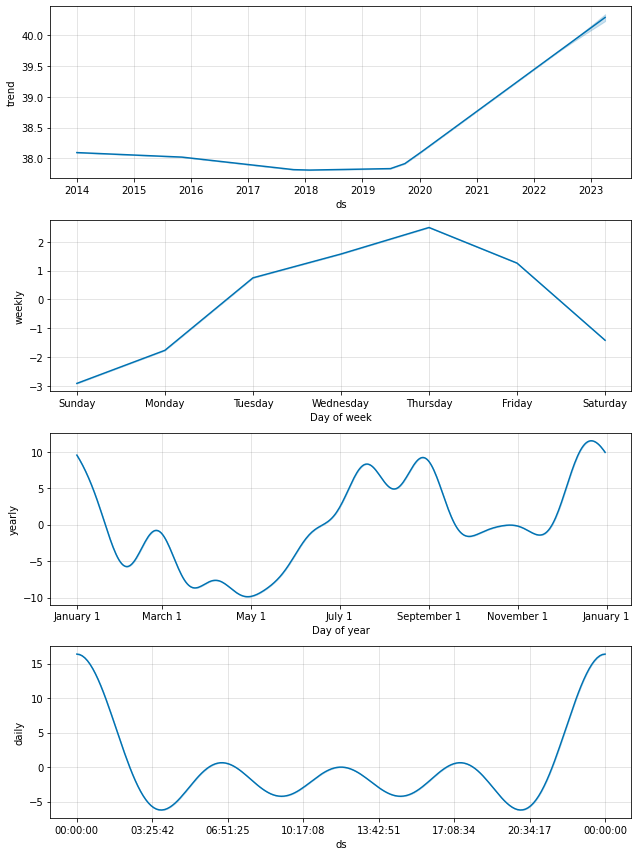

In [59]:
fb_subplots(model_values, forecast_values, 'value')

### Looking for changing points

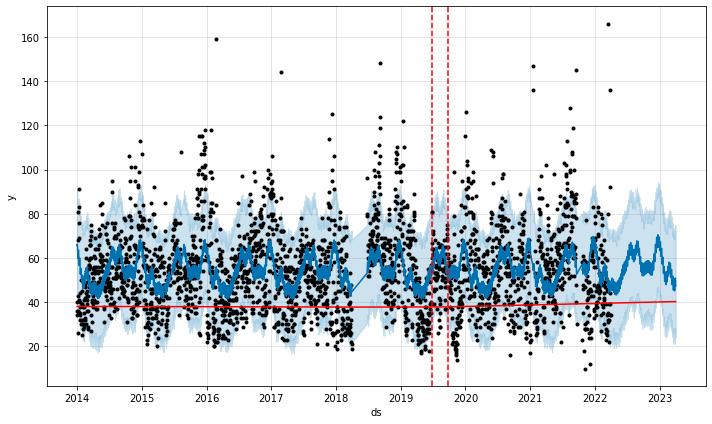

In [62]:
from fbprophet.plot import add_changepoints_to_plot

fig = model_values.plot(forecast_values)
a = add_changepoints_to_plot(fig.gca(), model_values, forecast_values)

In [64]:
model_values.changepoints

88     2014-04-05
176    2014-07-02
264    2014-09-29
352    2015-01-01
441    2015-03-31
529    2015-07-13
617    2015-10-26
705    2016-01-26
793    2016-04-23
881    2016-07-20
969    2016-10-16
1057   2017-01-14
1146   2017-04-13
1234   2017-07-14
1322   2017-10-15
1410   2018-01-15
1498   2018-07-07
1586   2018-10-03
1674   2019-01-01
1762   2019-03-30
1851   2019-06-27
1939   2019-09-27
2027   2019-12-24
2115   2020-03-26
2203   2020-06-26
Name: ds, dtype: datetime64[ns]